# Imports 

In [1]:
%load_ext autoreload
%autoreload 2

In [96]:
from collections import defaultdict
import os

import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.spatial import distance
import seaborn as sns
import tifffile

from image_processing import (
    split_image, 
    load_tiff_image, 
    convert_czi_to_three_grayscale_tiff
)

In [3]:
%matplotlib inline
sns.set()

# Load images

In [5]:
n_chunks = 9

In [48]:
# Split the image into `n_chunks` chunks
split_image(large_filename, n_chunks)

Split the image into 9 chunks: 3 rows and 3 columns
All chunks saved in ../../data/rat_dataset/201013_1900676_CX_x10_r_9parts


'../../data/rat_dataset/201013_1900676_CX_x10_r_9parts'

In [7]:
# Path to one file without extension
path_to_dataset = "../../data/rat_dataset/"
filename = "201013_1900676_CX_x10_r"
split_filename = filename+f"_{n_chunks}parts"

# Path to the large ".tiff" version
large_filename = os.path.join(path_to_dataset, filename+".tiff")
# Path to a central chunk of the large ".tiff"
central_small_filename = os.path.join(path_to_dataset, split_filename, split_filename+"_12.tiff")
# Path to a border chunk of the large ".tiff"
border_small_filename = os.path.join(path_to_dataset, split_filename, split_filename+"_22.tiff")

In [8]:
# Load images
large_image = cv2.imread(large_filename)
central_small_image = cv2.imread(central_small_filename)
border_small_image = cv2.imread(border_small_filename)

print(f"Shape of the large image: {large_image.shape}")
print(f"Shape of the central small image: {central_small_image.shape}")
print(f"Shape of the border small image: {border_small_image.shape}")

Shape of the large image: (22032, 24057, 3)
Shape of the central small image: (8019, 7344, 3)
Shape of the border small image: (8019, 7344, 3)


(-0.5, 7343.5, 8018.5, -0.5)

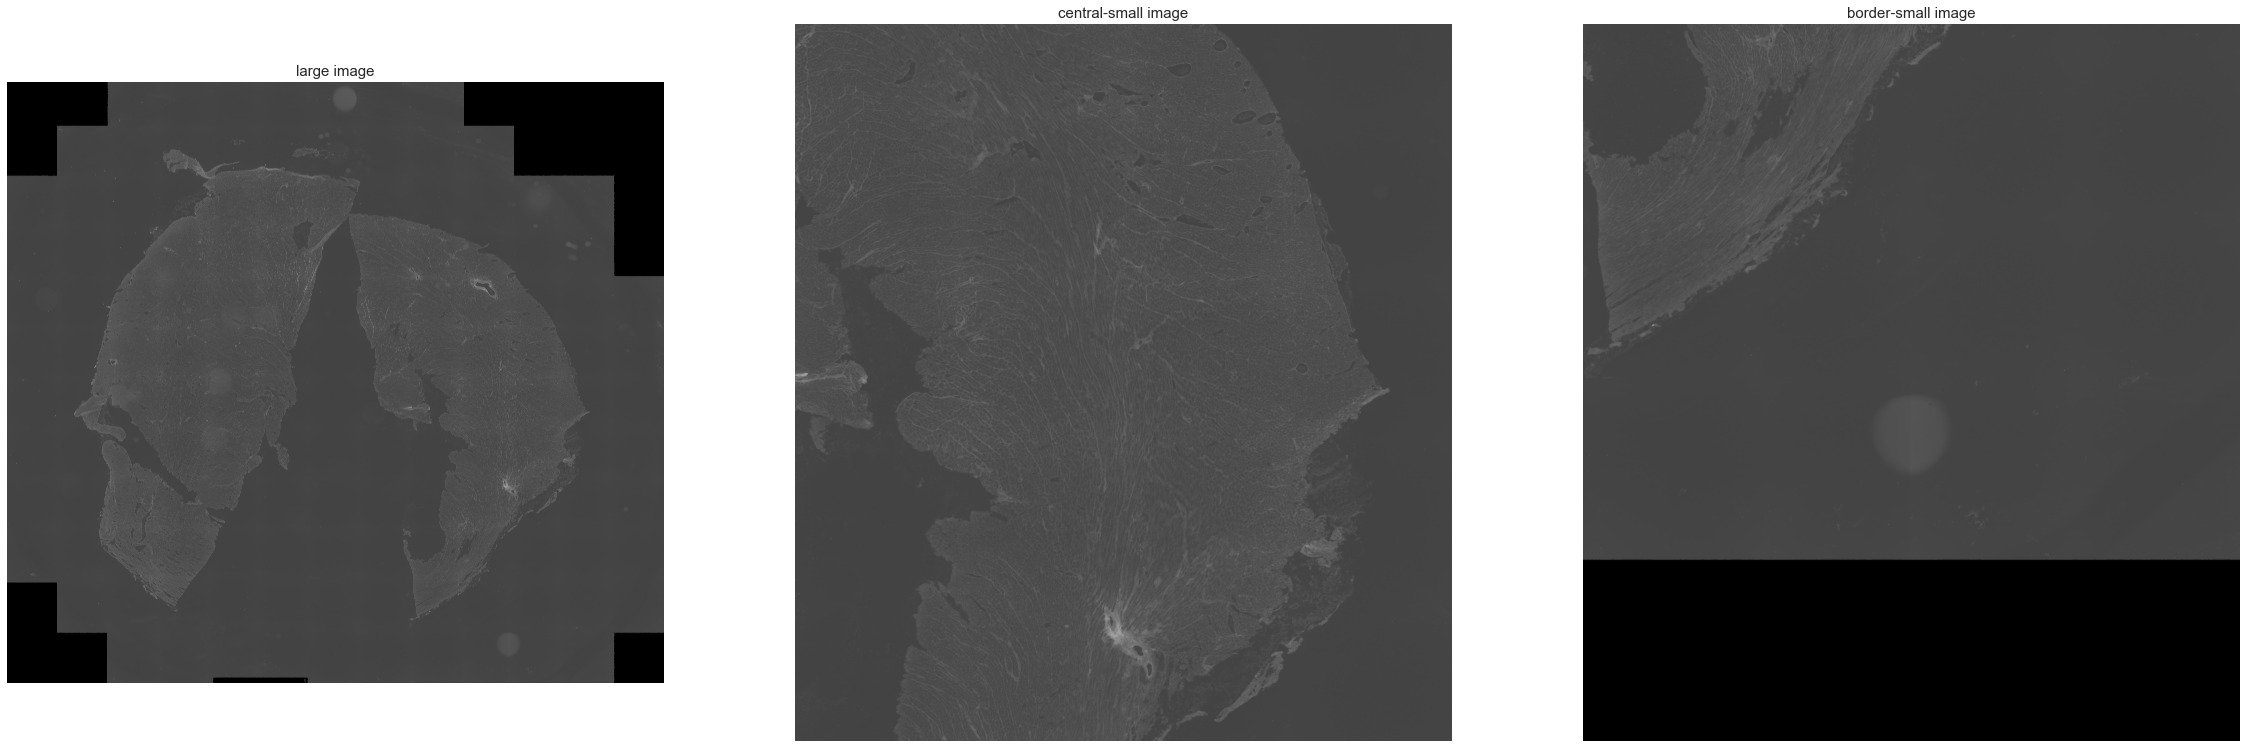

In [52]:
fig = plt.figure(figsize=(40,20))

ax1 = fig.add_subplot(131)
ax1.imshow(large_image)
ax1.set_title("large image", fontsize=15)
ax1.axis('off')

ax2 = fig.add_subplot(132)
ax2.imshow(central_small_image)
ax2.set_title("central-small image", fontsize=15)
ax2.axis('off')

ax3 = fig.add_subplot(133)
ax3.imshow(border_small_image)
ax3.set_title("border-small image", fontsize=15)
ax3.axis('off')

In [9]:
# Convert images to gray-scale
gray_large_image = cv2.cvtColor(large_image, cv2.COLOR_BGR2GRAY)
gray_central_small_image = cv2.cvtColor(central_small_image, cv2.COLOR_BGR2GRAY)
gray_border_small_image = cv2.cvtColor(border_small_image, cv2.COLOR_BGR2GRAY)

(-0.5, 7343.5, 8018.5, -0.5)

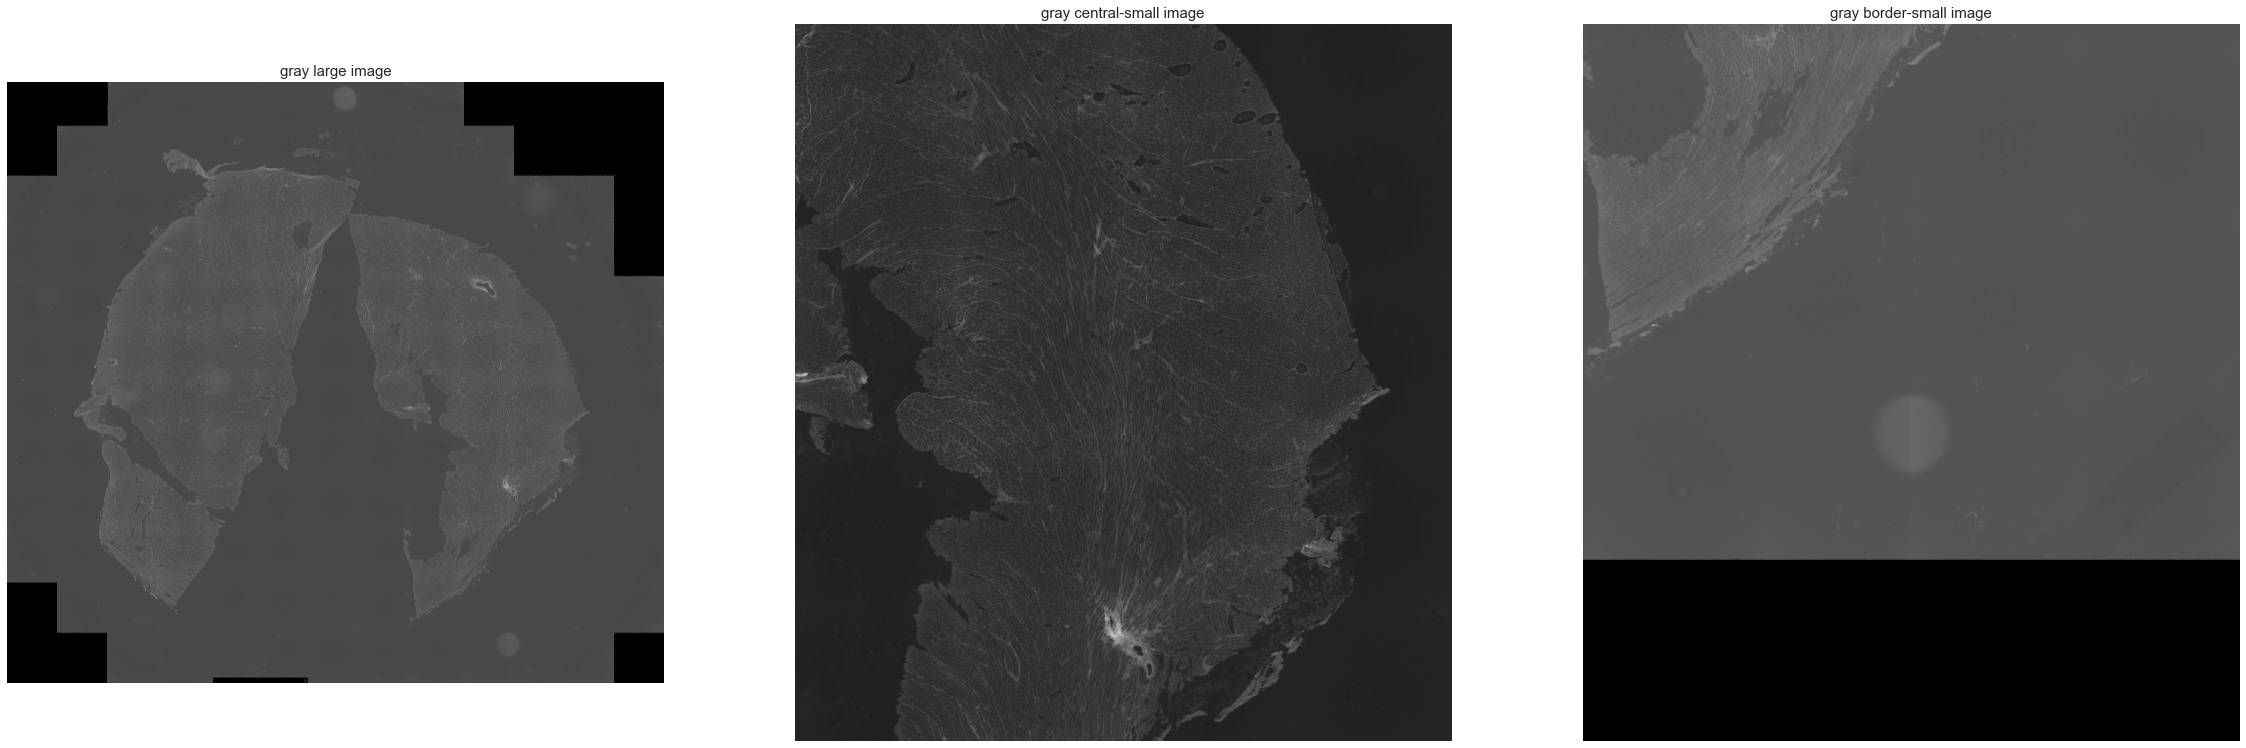

In [56]:
fig = plt.figure(figsize=(40,20))

ax1 = fig.add_subplot(131)
ax1.imshow(gray_large_image, cmap="gray")
ax1.set_title("gray large image", fontsize=15)
ax1.axis('off')

ax2 = fig.add_subplot(132)
ax2.imshow(gray_central_small_image, cmap="gray")
ax2.set_title("gray central-small image", fontsize=15)
ax2.axis('off')

ax3 = fig.add_subplot(133)
ax3.imshow(gray_border_small_image, cmap="gray")
ax3.set_title("gray border-small image", fontsize=15)
ax3.axis('off')

In [10]:
def plot_image(image: np.array, title: str = "", gray: bool = True):
    plt.figure(figsize=(20, 10))
    plt.axis("off")
    if gray:
        plt.imshow(image, cmap="gray")
    else:
        plt.imshow(image)
    plt.title(title, fontsize=20)

# Image Exploration

## Histogram

### Histogram visualisation

In [11]:
def plot_histogram(image: np.array, title: str = "", gray: bool = False):
    if gray:
        histogram = cv2.calcHist([image],[0],None,[256],[0,256])
        fig = plt.figure(figsize=(15, 5))
        plt.plot(histogram, color="gray")
        plt.title(title, fontsize=20)
    
    else:
        channels = ["blue", "green", "red"]
        fig, axs = plt.subplots(1,3, figsize=(15, 5))
        fig.suptitle(title, fontsize=20)
        axs = axs.ravel()
        for i, color in enumerate(channels):
            histogram = cv2.calcHist([image],[i],None,[256],[0,256])
            axs[i].plot(histogram, color=color)
            axs[i].set_title(color)
            
def plot_cumulative_histogram(image: np.array, title: str = "", gray: bool = False):
    if gray:
        histogram = cv2.calcHist([image],[0],None,[256],[0,256])
        # Compute the normalised cumulative histogram
        cumulative_histogram = histogram.cumsum() 
        cumulative_histogram *= histogram.max() / cumulative_histogram.max() 
        
        fig = plt.figure(figsize=(15, 5))
        plt.plot(cumulative_histogram, color="gray")
        plt.title(title, fontsize=20)
    
    else:
        channels = ["blue", "green", "red"]
        fig, axs = plt.subplots(1,3, figsize=(15, 5))
        fig.suptitle(title, fontsize=20)
        axs = axs.ravel()
        
        for i, color in enumerate(channels):
            histogram = cv2.calcHist([image],[i],None,[256],[0,256])
            # Compute the normalised cumulative histogram
            cumulative_histogram = histogram.cumsum() 
            cumulative_histogram *= histogram.max() / cumulative_histogram.max() 
            
            axs[i].plot(histogram, color=color)
            axs[i].set_title(color)

In [124]:
gray_large_image.max()

239

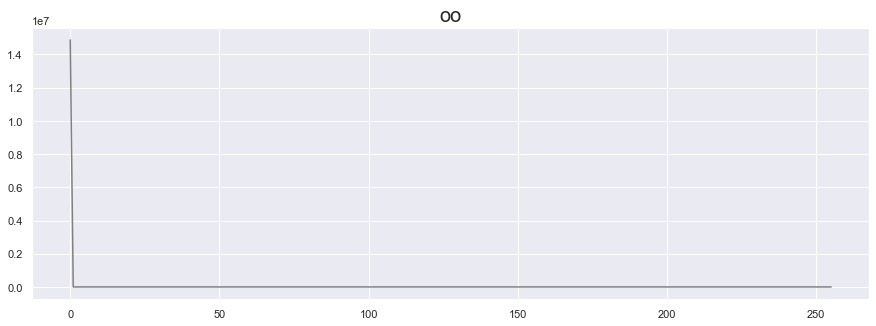

In [125]:
plot_histogram(oo, "oo", True)

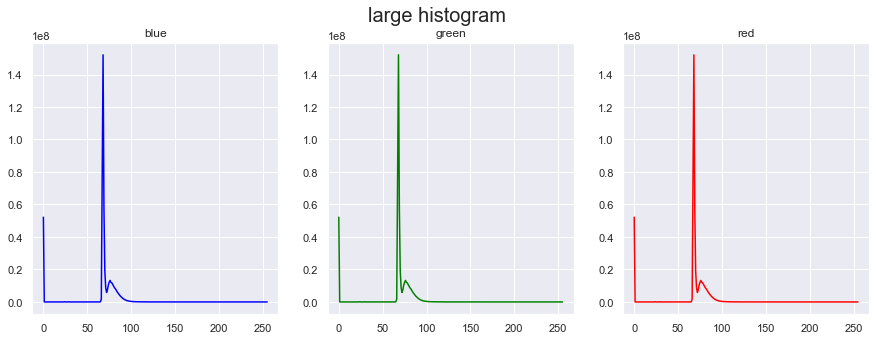

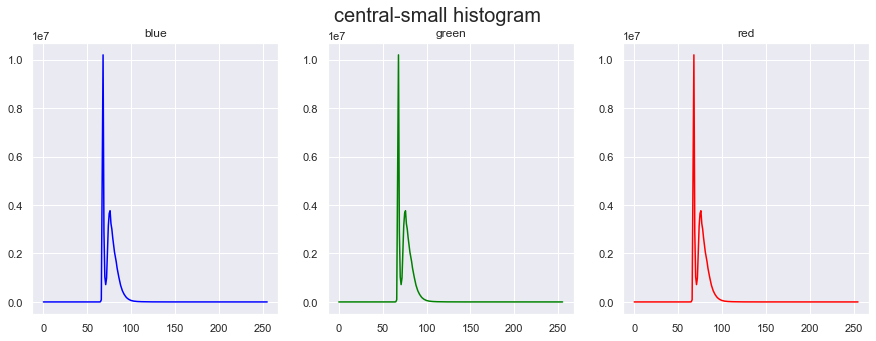

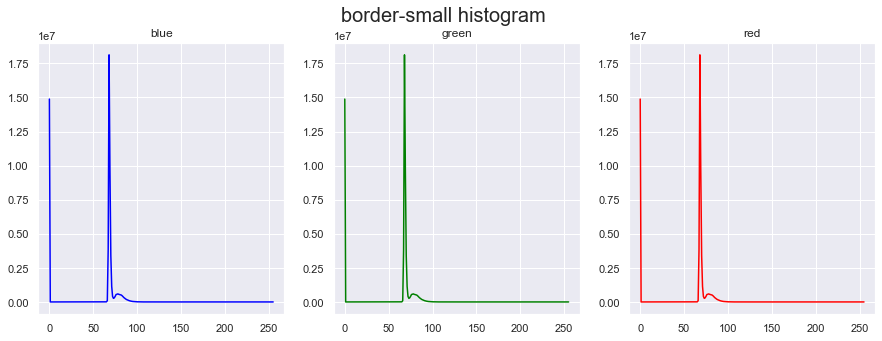

In [12]:
plot_histogram(large_image, "large histogram")
plot_histogram(central_small_image, "central-small histogram")
plot_histogram(border_small_image, "border-small histogram")

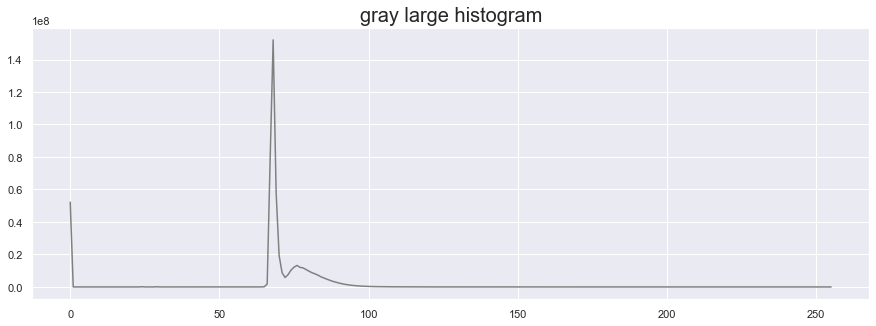

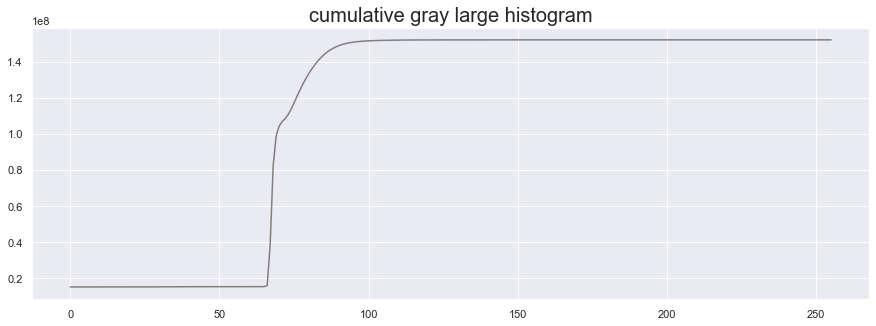

In [13]:
plot_histogram(gray_large_image, "gray large histogram", True)
plot_cumulative_histogram(gray_large_image, "cumulative gray large histogram", True)

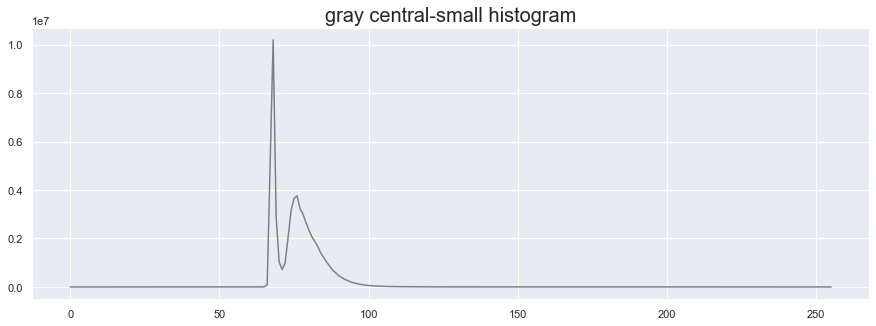

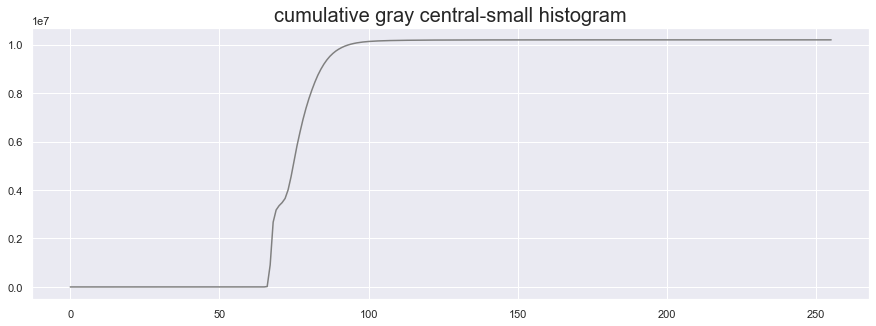

In [14]:
plot_histogram(gray_central_small_image, "gray central-small histogram", True)
plot_cumulative_histogram(gray_central_small_image, "cumulative gray central-small histogram", True)

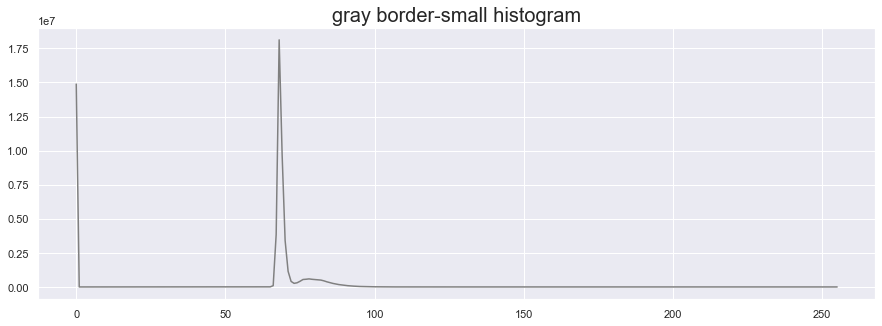

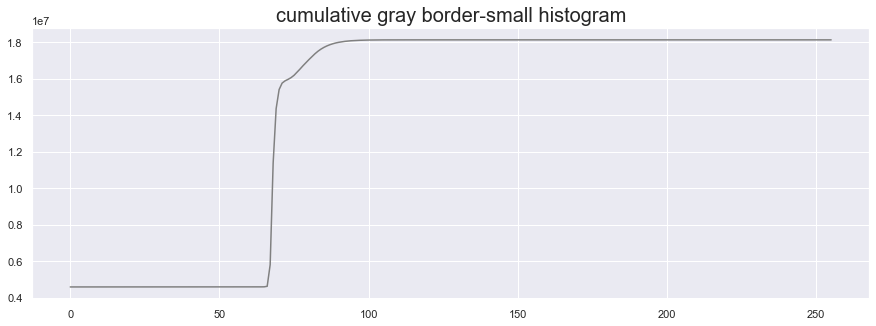

In [15]:
plot_histogram(gray_border_small_image, "gray border-small histogram", True)
plot_cumulative_histogram(gray_border_small_image, "cumulative gray border-small histogram", True)

### Histogram equalisation

In [16]:
def equalise_histogram(image: np.array):
    """Compute a lookup table to equalised a given image."""
    # Compute the histogram 
    histogram = cv2.calcHist([image],[0],None,[256],[0,256])
    # Compute the cummulative histogram
    cumulative_histogram = histogram.cumsum()
    
    # Mask zero pixels in order to not take them into account when 
    # equalising the histogram
    masked_cumulative_histogram = np.ma.masked_equal(cumulative_histogram, 0)
    # Equalise the histogram
    masked_cumulative_histogram = (
        (masked_cumulative_histogram - masked_cumulative_histogram.min()) * 255 
        /(masked_cumulative_histogram.max() - masked_cumulative_histogram.min())
    )
    
    equalised_histogram = np.ma.filled(masked_cumulative_histogram, 0).astype('uint8')
    
    return equalised_histogram

In [17]:
equaliser_lookup_table = equalise_histogram(gray_large_image)
equalised_large_image = equaliser_lookup_table[gray_large_image]
equalised_central_small_image = equaliser_lookup_table[gray_central_small_image]
equalised_border_small_image = equaliser_lookup_table[gray_border_small_image]

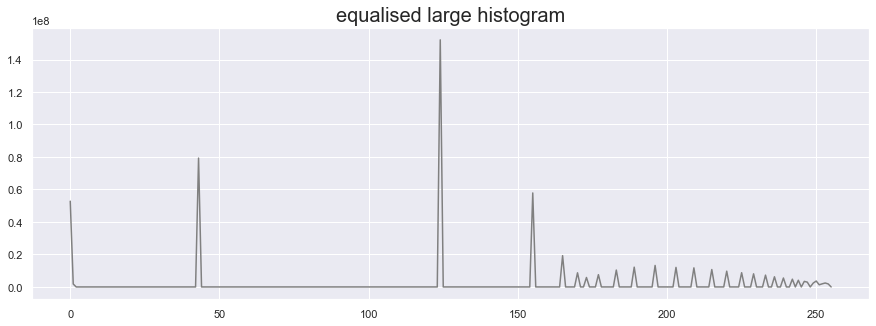

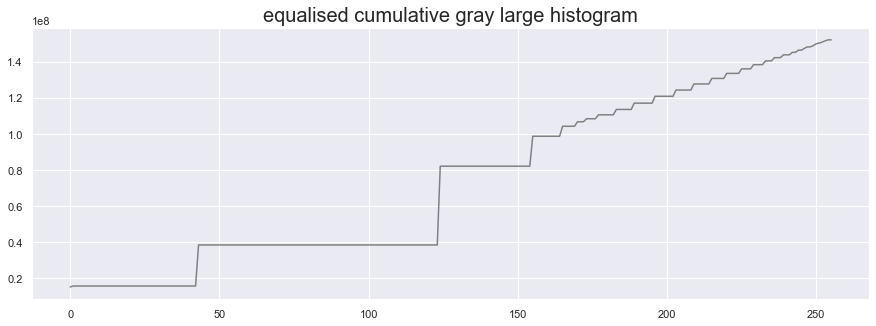

In [18]:
plot_histogram(equalised_large_image, "equalised large histogram", True)
plot_cumulative_histogram(equalised_large_image, "equalised cumulative gray large histogram", True)

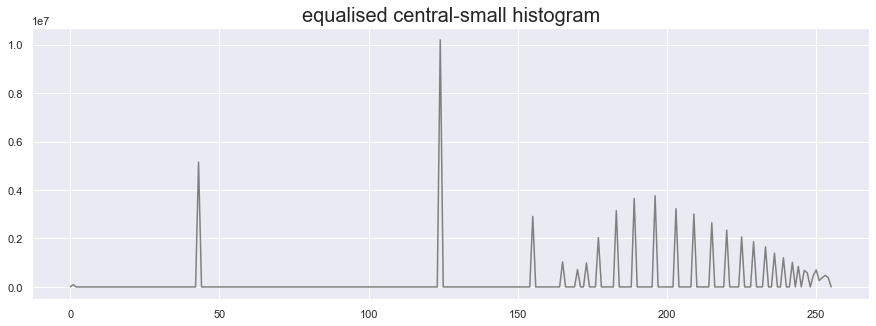

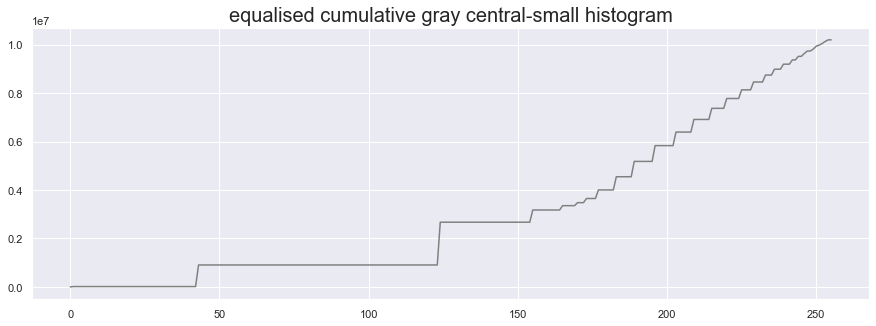

In [19]:
plot_histogram(equalised_central_small_image, "equalised central-small histogram", True)
plot_cumulative_histogram(equalised_central_small_image, "equalised cumulative gray central-small histogram", True)

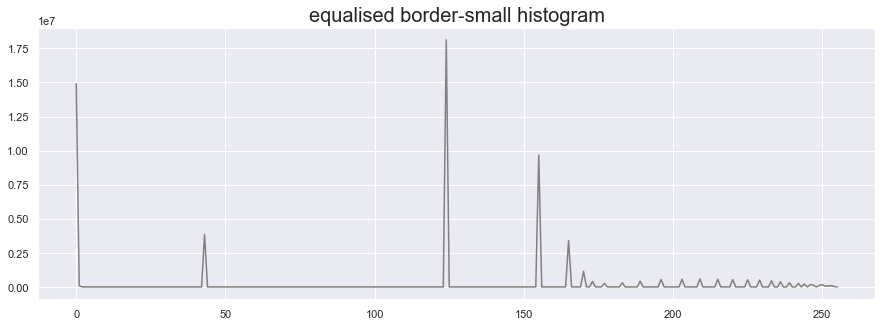

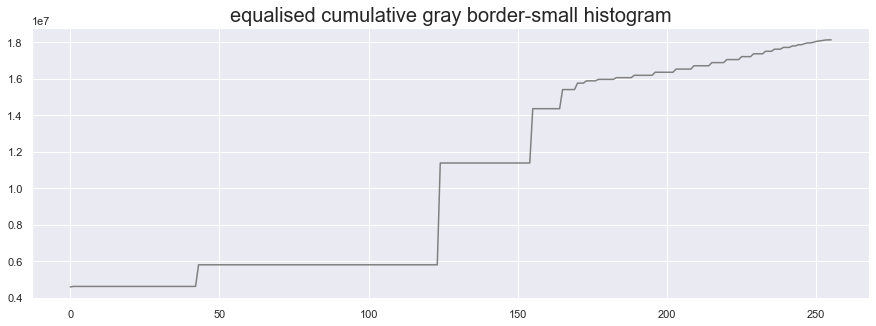

In [20]:
plot_histogram(equalised_border_small_image, "equalised border-small histogram", True)
plot_cumulative_histogram(equalised_border_small_image, "equalised cumulative gray border-small histogram", True)

(-0.5, 7343.5, 8018.5, -0.5)

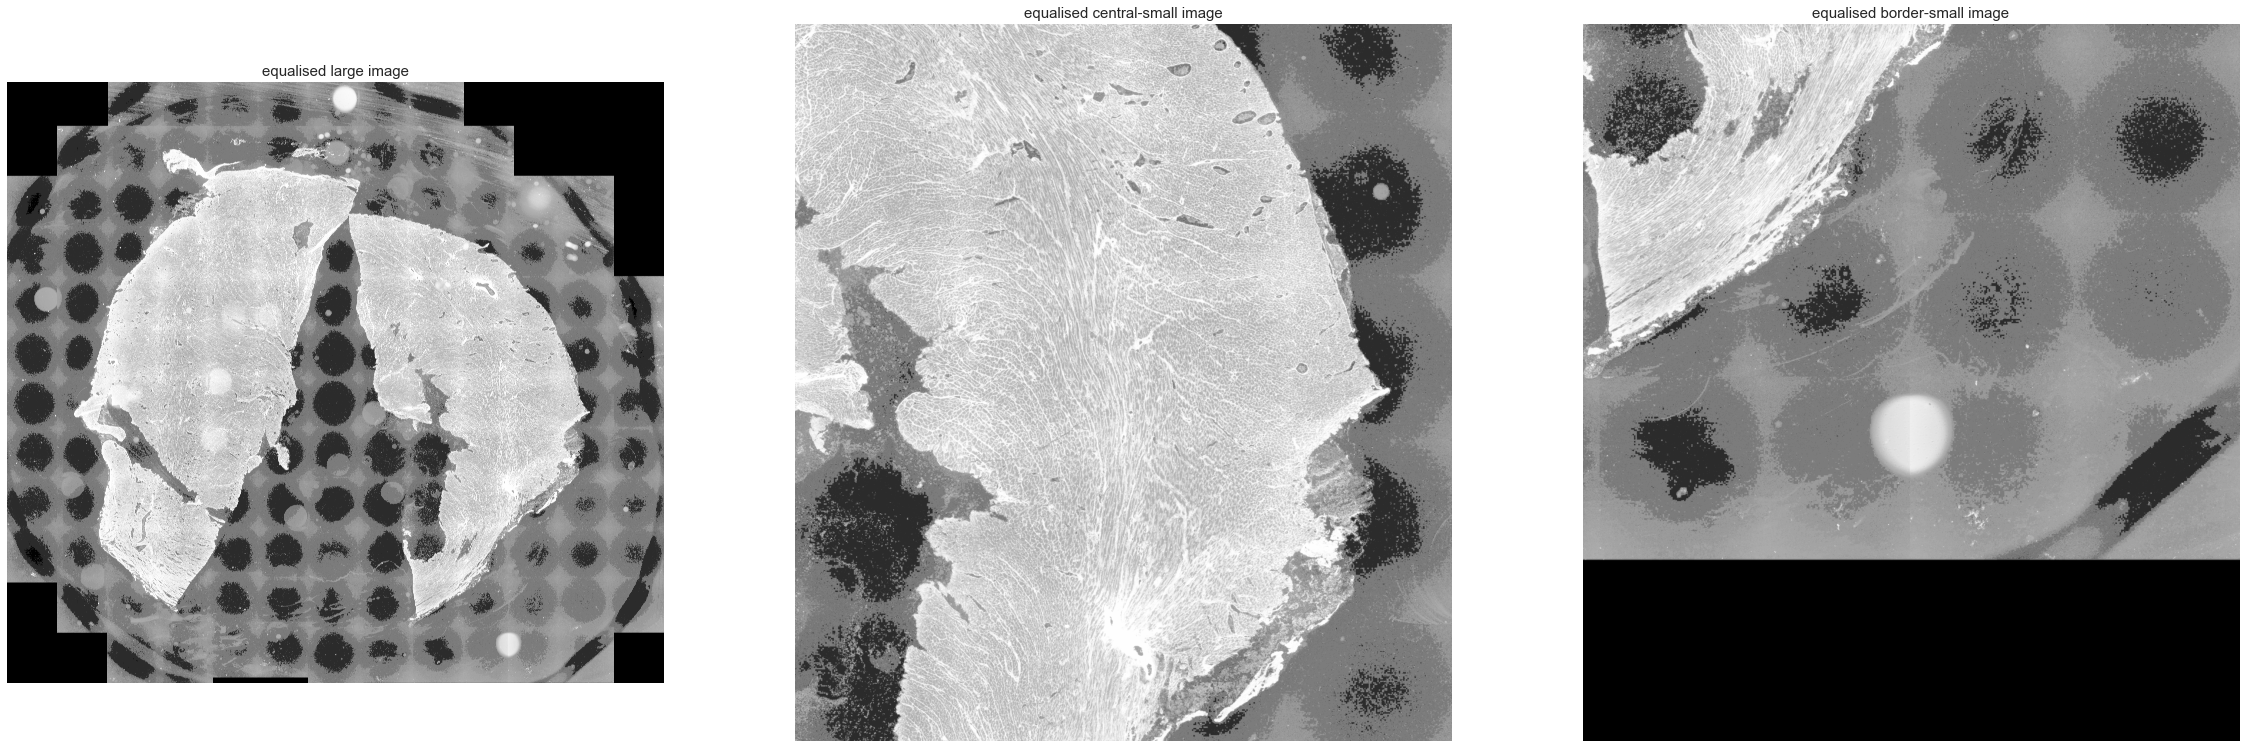

In [68]:
fig = plt.figure(figsize=(40,20))

ax1 = fig.add_subplot(131)
ax1.imshow(equalised_large_image, cmap="gray")
ax1.set_title("equalised large image", fontsize=15)
ax1.axis('off')

ax2 = fig.add_subplot(132)
ax2.imshow(equalised_central_small_image, cmap="gray")
ax2.set_title("equalised central-small image", fontsize=15)
ax2.axis('off')

ax3 = fig.add_subplot(133)
ax3.imshow(equalised_border_small_image, cmap="gray")
ax3.set_title("equalised border-small image", fontsize=15)
ax3.axis('off')

In [26]:
inverse_lookup_table = 255 - np.arange(0, 256, 1)

inverse_equalised_large_image = inverse_lookup_table[equalised_large_image]
inverse_equalised_central_small_image = inverse_lookup_table[equalised_central_small_image]
inverse_equalised_border_small_image = inverse_lookup_table[equalised_border_small_image]

(-0.5, 7343.5, 8018.5, -0.5)

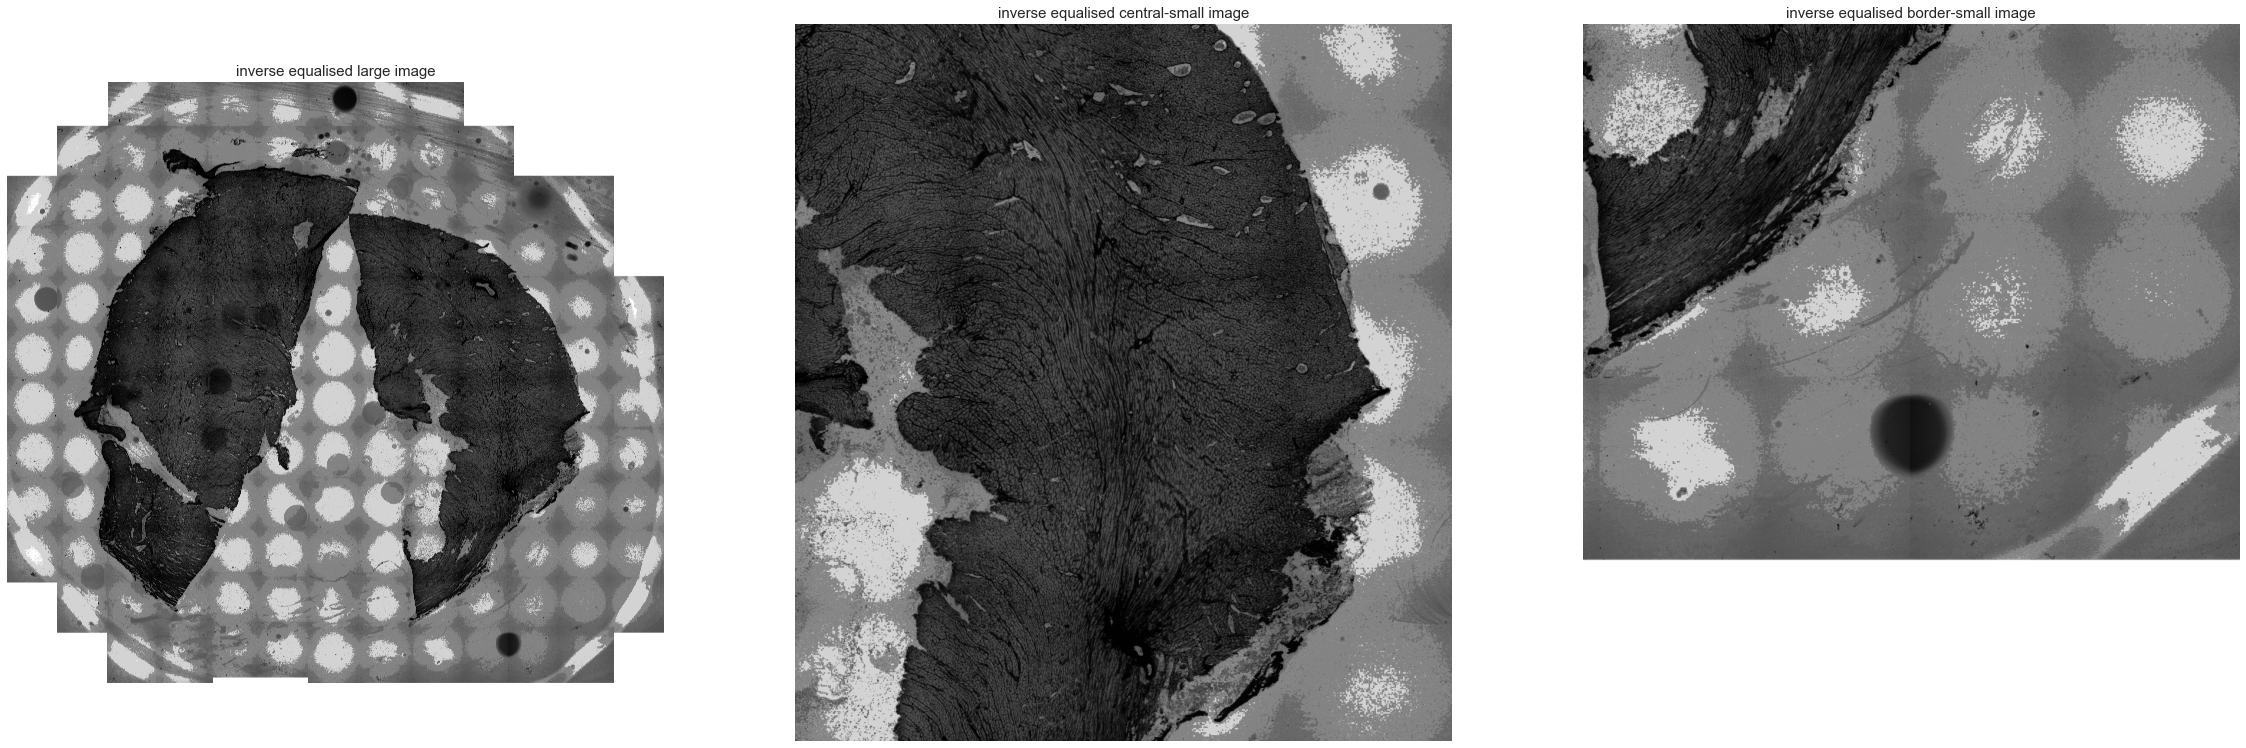

In [221]:
fig = plt.figure(figsize=(40,20))

ax1 = fig.add_subplot(131)
ax1.imshow(inverse_equalised_large_image, cmap="gray")
ax1.set_title("inverse equalised large image", fontsize=15)
ax1.axis('off')

ax2 = fig.add_subplot(132)
ax2.imshow(inverse_equalised_central_small_image, cmap="gray")
ax2.set_title("inverse equalised central-small image", fontsize=15)
ax2.axis('off')

ax3 = fig.add_subplot(133)
ax3.imshow(inverse_equalised_border_small_image, cmap="gray")
ax3.set_title("inverse equalised border-small image", fontsize=15)
ax3.axis('off')

### Thresholds

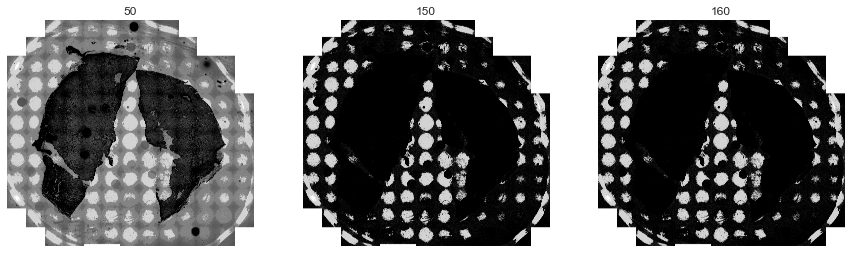

In [27]:
thresholds = [50, 150, 160]
fig, axs = plt.subplots(1,3, figsize=(15, 5))
# fig.suptitle(title, fontsize=20)
axs = axs.ravel()
for i, threshold in enumerate(thresholds):
    thresholded_image = np.where(inverse_equalised_large_image < threshold, 0, inverse_equalised_large_image)
    axs[i].imshow(thresholded_image, cmap="gray")
    axs[i].set_title(str(threshold))
    axs[i].axis("off")

(-0.5, 9999.5, 9999.5, -0.5)

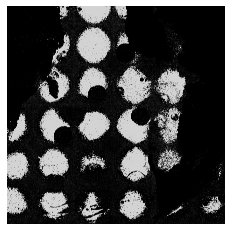

In [30]:
test_image = thresholded_image[10000:20000, 8000:18000]
plt.imshow(test_image, cmap="gray")
plt.axis("off")

(-0.5, 9999.5, 9999.5, -0.5)

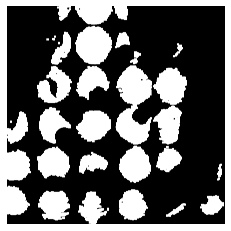

In [31]:
kernel = np.ones((5,5), np.uint8)
erosion = cv2.erode(test_image.astype(np.uint8), np.ones((5,5), np.uint8), iterations=3)
dilatation = cv2.dilate(erosion.astype(np.uint8), np.ones((20,20), np.uint8), iterations=5)
plt.imshow(dilatation, cmap="gray")
plt.axis("off")

(-0.5, 9999.5, 9999.5, -0.5)

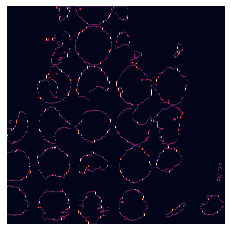

In [32]:
# find the contours from the thresholded image
contours, hierarchy = cv2.findContours(dilatation, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# draw all contours
image = cv2.drawContours(np.ones(dilatation.shape), contours, -1, (255, 0, 0), 10)
plt.imshow(image)
plt.axis("off")

In [33]:
areas, centroids = [], []
for shape in contours:
    moments = cv2.moments(shape)
    areas.append(moments["m00"])
    if moments["m00"] > 10**5:
        centroids.append(
            (int(moments["m10"] / moments["m00"]), int(moments["m01"]/ moments["m00"])) 
        )
        print(moments["m00"])

192926.5
627584.5
1121447.5
1482415.0
1384264.0
1045991.5
833827.5
1273629.5
1607834.0
896232.0
1786728.0
813557.0
1655784.5
1372619.0
1538982.0
1838974.5
1392067.0
1550705.0
3827053.5
105149.5
318721.5
692986.5
2243425.0
323413.0
1114076.0
278569.5


(-0.5, 9999.5, 9999.5, -0.5)

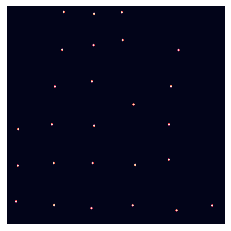

In [34]:
points = np.ones(image.shape)
                 
for centroid in centroids:
    points = cv2.circle(points, centroid, 0, (255, 0, 0), 100)
    
plt.imshow(points)
plt.axis("off")

TypeError: scatter() missing 1 required positional argument: 'y'

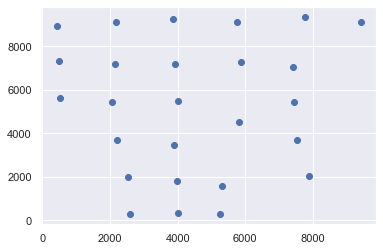

In [37]:
plt.scatter(plt.scatter(*zip(*centroids)))

In [102]:
X = np.array([point[0] for point in centroids])
Y = np.array([point[1] for point in centroids])
coordinates_df = pd.DataFrame.from_dict({"X": X, "Y": Y})

distances = distance.squareform(distance.pdist(X.reshape(-1, 1)))

n_points = 26
visited = []
clusters = []
for i in range(n_points):
    if i in visited:
        pass
    
    else:
        neighbors = []
        visited.append(i)
        neighbors.append(i)
        for j, distance in enumerate(distances[i]):
            if distance < 500 and j not in visited:
                visited.append(j)
                neighbors.append(j)

        clusters.append(neighbors)

In [105]:
X_clusters = np.zeros(n_points)
for cluster_name, cluster_points in enumerate(clusters):
    for point in cluster_points:
        X_clusters[point] = cluster_name

coordinates_df["X_clusters"] = X_clusters

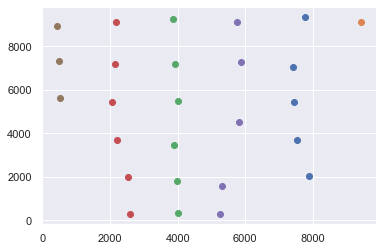

In [106]:
groups = coordinates_df.groupby("X_clusters")
for name, group in groups:
    plt.plot(group["X"], group["Y"], marker="o", linestyle="", label=name)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


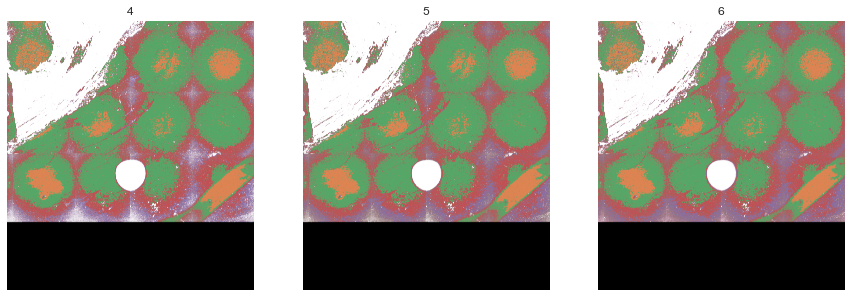

In [19]:
palette = sns.color_palette(as_cmap=True)
fig, axs = plt.subplots(1,3, figsize=(15, 5))
axs = axs.ravel()

image = cv2.cvtColor(equalised_border_small_image, cv2.COLOR_GRAY2BGR)
shades = np.unique(equalised_border_small_image)[1:8]
for i, value in enumerate(shades):
    image = np.where(image == np.array([value, value, value]), np.array(palette[i]), image)
    if i > 3:
        I = i - 4
        axs[I].imshow(image)
        axs[I].set_title(str(i))
        axs[I].axis("off")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


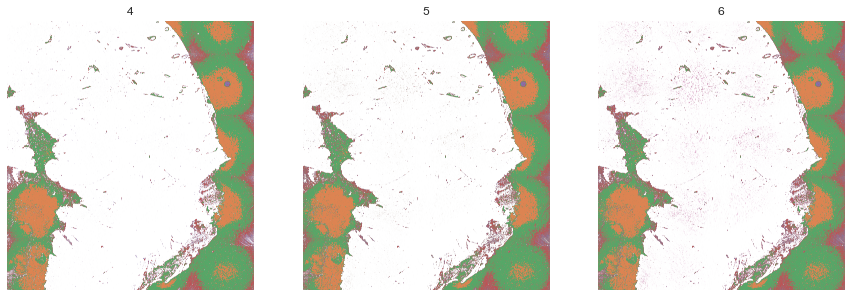

In [20]:
palette = sns.color_palette(as_cmap=True)
fig, axs = plt.subplots(1,3, figsize=(15, 5))
axs = axs.ravel()

image = cv2.cvtColor(equalised_central_small_image, cv2.COLOR_GRAY2BGR)
shades = np.unique(equalised_border_small_image)[1:8]
for i, value in enumerate(shades):
    image = np.where(image == np.array([value, value, value]), np.array(palette[i]), image)
    if i > 3:
        I = i - 4
        axs[I].imshow(image)
        axs[I].set_title(str(i))
        axs[I].axis("off")

# Tests

## Watershed segmentation

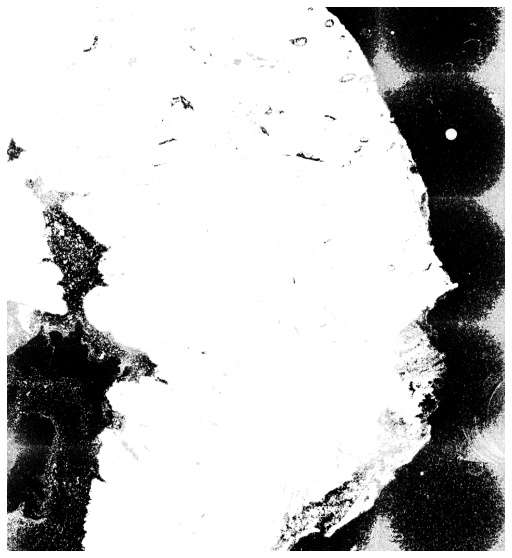

In [55]:
# Threshold image
image = equalised_central_small_image
threshold = cv2.THRESH_BINARY + cv2.THRESH_OTSU
_, thresh = cv2.threshold(image, 0, 255, threshold) 

plot_image(thresh)

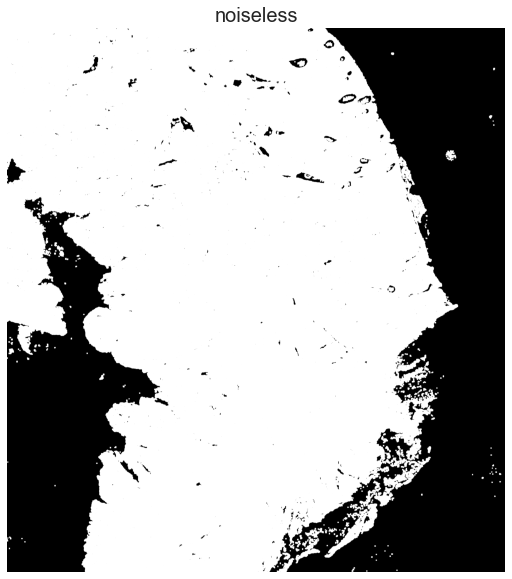

In [58]:
# Noise removal
kernel = np.ones((5,5),np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations = 4)

plot_image(opening, "noiseless")

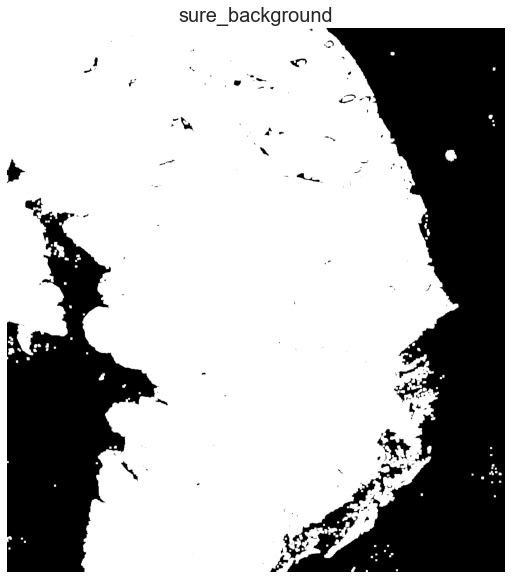

In [59]:
# Finding sure background area
sure_background = cv2.dilate(opening, kernel, iterations=3)

plot_image(sure_background, "sure_background")

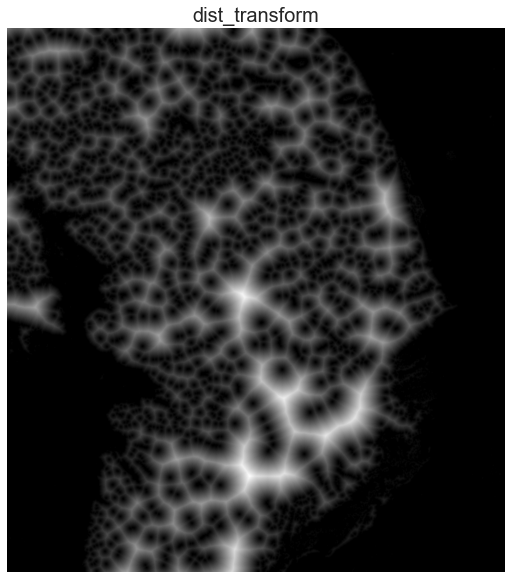

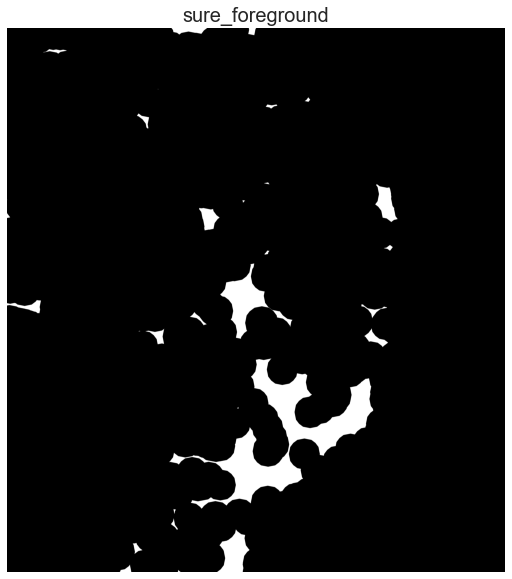

In [67]:
# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
_, sure_foreground = cv2.threshold(dist_transform, 0.5 * dist_transform.max(), 255, 0)
sure_foreground = np.uint8(sure_foreground)

plot_image(dist_transform, "dist_transform")
plot_image(sure_foreground, "sure_foreground")

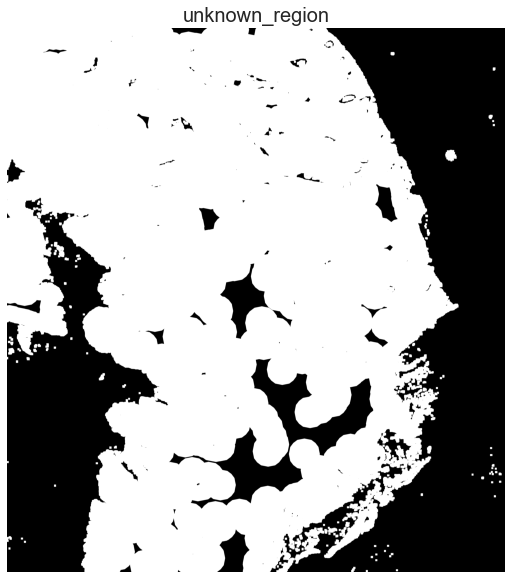

In [68]:
# Finding unknown region
unknown_region = cv2.subtract(sure_background, sure_foreground)

plot_image(unknown_region, "unknown_region")

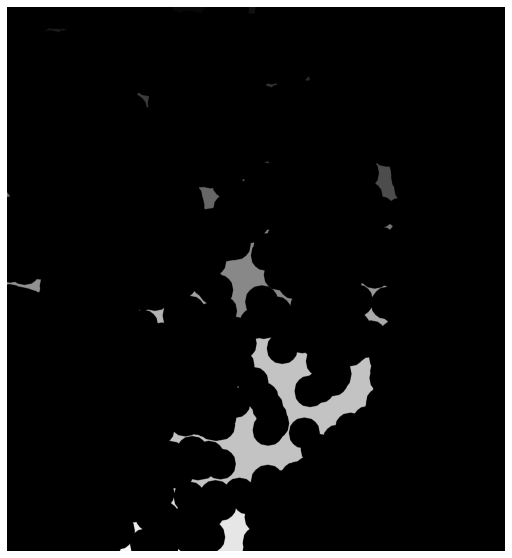

In [70]:
# Marker labelling
_, markers = cv2.connectedComponents(sure_foreground)

plot_image(markers)

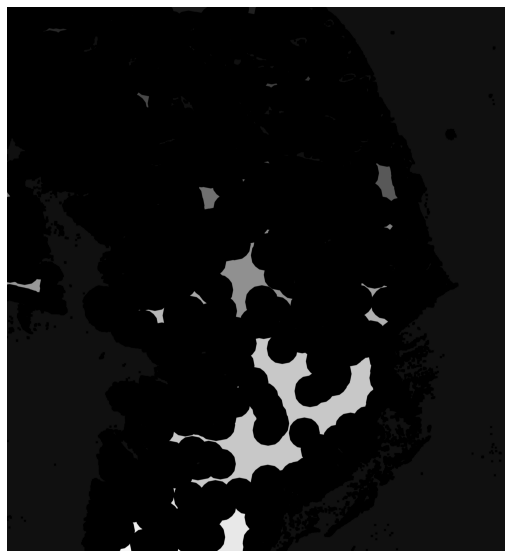

In [72]:
# Add one to all labels so that sure background is not 0, but 1
markers += 1

# Now, mark the region of unknown with zero
markers[unknown_region == 255] = 0

plot_image(markers)

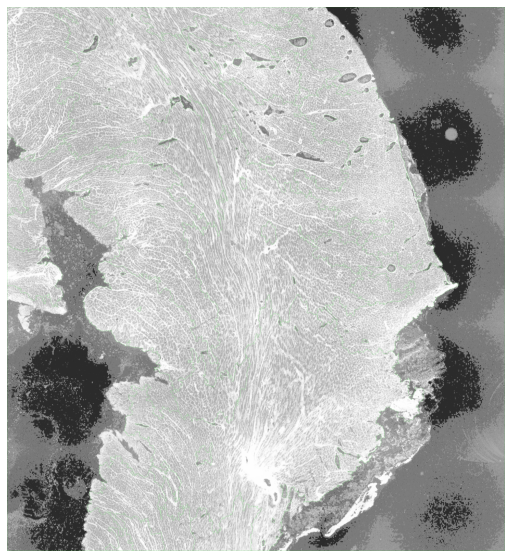

In [86]:
colored_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
markers = cv2.watershed(colored_image, markers)
colored_image[markers == -1] = [0, 255, 0]

plot_image(colored_image, gray=False)

## GrabCut

In [ ]:
image = cv2.cvtColor(equalised_central_small_image, cv2.COLOR_GRAY2BGR)

mask = np.zeros(image.shape[:2], np.uint8)
background_model = np.zeros((1,65),np.float64)
foreground_model = np.zeros((1,65),np.float64)

rectangle = (50,50,450,290)

cv2.grabCut(image, mask, rectangle, background_model, foreground_model, 5, cv2.GC_INIT_WITH_RECT)

mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')
image *= mask2[:, :, np.newaxis]

plt.imshow(image)
plt.colorbar()

In [ ]:
mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')
image *= mask2[:, :, np.newaxis]

plt.imshow(image)
plt.colorbar()